# Código TP1: Generación de Datos y Ajuste de Modelos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from typing import Tuple

# Ejercicio 1

## Ejercicio 1a (Diagonal)

In [2]:
def diagonal(d: int, C: float, n: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Genera sampleos de dos gausianas d-dimensionales en posición diagonal
    (una respecto a la otra), con dispersión C * sqrt(d).
    Cada sampleo posee n/2 puntos.

    Argumentos:
        d: número de dimensiones
        C: constante de ajuste de dispersión

    Retorna:
        X: matriz con d columnas y n filas de datos
        y: arreglo de n elementos con las clases correspondientes
            a cada fila de datos
    """
    mean0 = np.full(d, -1)
    mean1 = np.full(d, 1)

    desviacion_std = C * math.sqrt(d)
    covarianza = np.diag(np.full(d, desviacion_std)**2)

    input0 = np.random.multivariate_normal(mean0, covarianza, n//2) 
    input1 = np.random.multivariate_normal(mean1, covarianza, n//2) 

    output0 = np.full(n//2, 0)
    output1 = np.full(n//2, 1)

    X = np.concatenate([input0, input1])
    y = np.concatenate([output0, output1])

    #return pd.DataFrame({"x": inputs.tolist(), "y": outputs})
    return X, y

## Ejercicio 1b (Espirales)

In [3]:
def espirales(n: int) -> Tuple[np.ndarray, np.ndarray]:
    """ Generador de espirales """
    # Generar n puntos aleatorios dentro de un círculo de radio 1
    radius = np.random.uniform(0, 1, n)
    angle = np.random.uniform(0, 2 * np.pi, n)
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)

    # Convertir las coordenadas x-y a coordenadas polares
    rho = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)

    # Asignar etiquetas de clase basadas en las coordenadas polares
    condition = (
        ((rho >= theta / (4 * np.pi)) & (rho <= (theta + np.pi) / (4 * np.pi))) |
        ((rho >= (theta + 2 * np.pi) / (4 * np.pi)) & (rho <= (theta + 3 * np.pi) / (4 * np.pi))) |
        ((rho >= (theta + 4 * np.pi) / (4 * np.pi)) & (rho <= (theta + 5 * np.pi) / (4 * np.pi)))
    )
    class_labels = np.where(condition, 0, 1)

    # Crear un dataframe con los inputs y outputs

    X = pd.DataFrame({'x': x, 'y': y})

    return X, class_labels

## Ejercicio 1c (N-Gausianas)

In [4]:
def ngausianas(d: int, medias: np.ndarray, desvios: np.ndarray) -> \
        Tuple[np.ndarray, np.ndarray]:
    """ Generador de gausianas """
    assert(medias.shape[0] == desvios.shape[0]), \
        print('Medias y sds tienen distinto nro. de elementos.')

    pass  # COMPLETAR

    return X, y

## Ejercicio 1d: Gráficos

In [5]:
# Generación de datos (útil también para testear las funciones)

diag1_X, diag1_y = diagonal(d=2, C=0.3, n=300)
diag2_X, diag2_y = diagonal(d=10, C=0.5, n=10000)

espirales1_X, espirales1_y = espirales(n=300)
espirales2_X, espirales2_y = espirales(n=10000)

# n-gaussianas
#medias = np.array([[-2,-2],[4,0],[1.4,5],[-2,2]])
#sds = np.array([1, 1, 0.5, 0.5])
#ngausianas_X, ngausianas_y = ngausianas(d=2, medias=medias, desvios=sds)


[]

<Figure size 640x480 with 0 Axes>

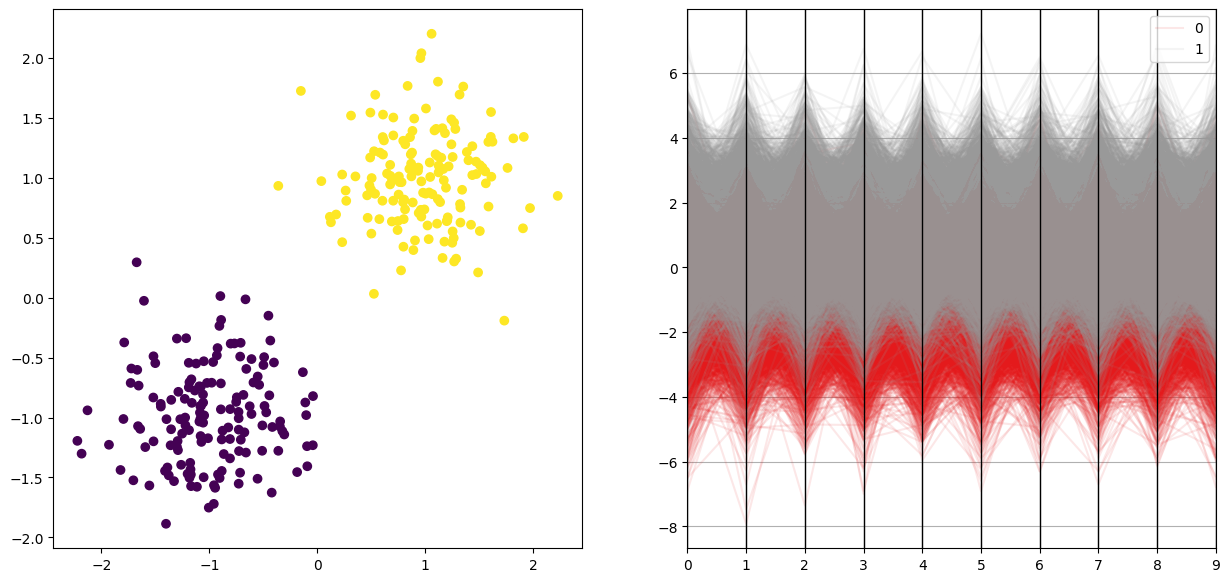

In [6]:
# Generación de gráficos
# Recomendamos generar una celda de código para cada gráfica, de forma de poder
# ejecutarlas indepentientemente

# Scatterplot para diagonal con d=2
fig = plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
x_coords, y_coords = zip(*diag1_X)
axes[0].scatter(x_coords, y_coords, c=diag1_y)

# Parallel plot para diagonal con d=n
df_diag2 = pd.DataFrame(diag2_X)
df_diag2['class'] = diag2_y.astype(str)  # Convertir clases a string para colores

pd.plotting.parallel_coordinates(df_diag2, 'class', colormap=plt.get_cmap("Set1"), alpha=0.1)

plt.plot()

<Figure size 800x800 with 0 Axes>

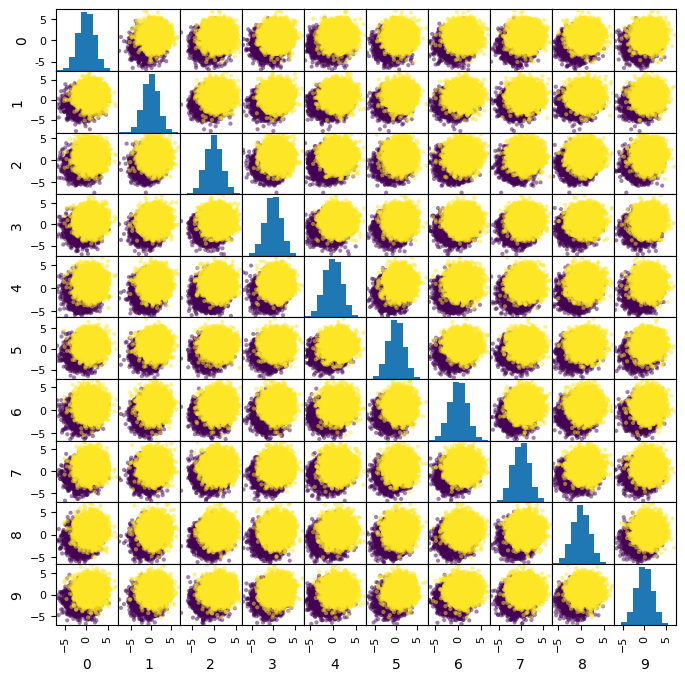

In [7]:
#extra scatter matrix
plt.figure(figsize=(8, 8))
pd.plotting.scatter_matrix(df_diag2, figsize=(8, 8), diagonal='hist',c = diag2_y)
plt.show()

[]

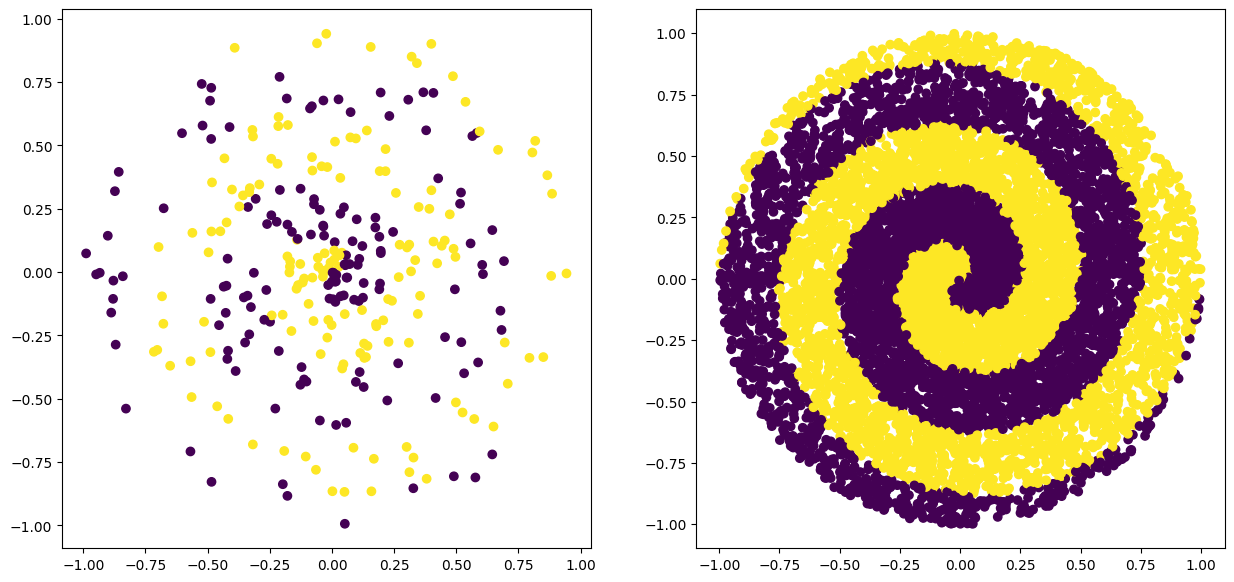

In [8]:

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].scatter(espirales1_X['x'], espirales1_X['y'], c=espirales1_y)
axes[1].scatter(espirales2_X['x'], espirales2_X['y'], c=espirales2_y)
plt.plot()

# Ejercicio 2 (Ajuste de Modelos)

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [10]:
tree_test_error_diagonales_avg = 0
kn_test_error_diagonales_avg = 0
tree_test_error_espirales_avg = 0
kn_test_error_espirales_avg = 0

tree_cv_error_diagonales_avg = np.full((1,5), 0.0)
tree_cv_error_espirales_avg = np.full((1,5), 0.0)
kn_cv_error_diagonales_avg = np.full((1,5), 0.0)
kn_cv_error_espirales_avg = np.full((1,5), 0.0)

num_runs = 10
for _ in range(num_runs):
    diagTrain_X, diagTrain_y = diagonal(d=2, C=0.3, n=300)
    diagTest_X, diagTest_y = diagonal(d=2, C=0.5, n=10000)

    espiralesTrain_X, espiralesTrain_y = espirales(n=300)
    espiralesTrain_X = espiralesTrain_X.values
    espiralesTest_X, espiralesTest_y = espirales(n=10000)
    espiralesTest_X = espiralesTest_X.values

    tree_diagonales = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    tree_diagonales.fit(diagTrain_X, diagTrain_y)

    tree_espirales = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    tree_espirales.fit(espiralesTrain_X, espiralesTrain_y)

    kn_diagonales = KNeighborsClassifier().fit(diagTrain_X, diagTrain_y)
    kn_espirales = KNeighborsClassifier().fit(espiralesTrain_X, espiralesTrain_y)

    tree_test_error_diagonales_avg += 1 - tree_diagonales.score(diagTest_X, diagTest_y)
    tree_test_error_espirales_avg += 1 - tree_diagonales.score(espiralesTest_X, espiralesTest_y)
    kn_test_error_diagonales_avg += 1 - kn_diagonales.score(diagTest_X, diagTest_y)
    kn_test_error_espirales_avg += 1 - kn_espirales.score(espiralesTest_X, espiralesTest_y)

    tree_cv_error_diagonales_avg += np.full((1,5), 1) - cross_val_score(tree_diagonales, diagTrain_X, diagTrain_y, cv=5)
    tree_cv_error_espirales_avg += np.full((1,5), 1) - cross_val_score(tree_espirales, espiralesTrain_X, espiralesTrain_y, cv=5)
    kn_cv_error_diagonales_avg += np.full((1,5), 1) - cross_val_score(kn_diagonales, diagTrain_X, diagTrain_y, cv=5)
    kn_cv_error_espirales_avg += np.full((1,5), 1) - cross_val_score(kn_espirales, espiralesTrain_X, espiralesTrain_y, cv=5)


print(f"Test error árbol diag: {tree_test_error_diagonales_avg}")
print(f"Test error árbol esp: {tree_test_error_espirales_avg}")
print(f"Test error knn diag: {kn_test_error_diagonales_avg}")
print(f"Test error knn esp: {kn_test_error_espirales_avg}")

print(tree_cv_error_diagonales_avg/num_runs)
print(tree_cv_error_espirales_avg/num_runs) 
print(kn_cv_error_diagonales_avg/num_runs)
print(kn_cv_error_espirales_avg/num_runs)

Test error árbol diag: 0.8054999999999999
Test error árbol esp: 5.0661000000000005
Test error knn diag: 0.23350000000000004
Test error knn esp: 1.6572999999999996
[[0.005      0.01333333 0.015      0.01       0.01833333]]
[[0.29666667 0.295      0.29       0.26666667 0.30833333]]
[[0.00166667 0.         0.         0.00166667 0.        ]]
[[0.17833333 0.20666667 0.17       0.155      0.17666667]]


# Ejercicio 3 (Visualización)

In [11]:
import seaborn as sns  # visualización estilo matplotlib, trae datasets
import plotly as ply
from sklearn.datasets import load_iris  # clásico dataset de juguete
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
from plotly.graph_objects import Scatterpolar

# https://pypi.org/project/ChernoffFace/
#! pip install git+https://github.com/antononcube/Python-packages.git#egg=ChernoffFace\&subdirectory=ChernoffFace --quiet
from ChernoffFace import chernoff_face

In [12]:
# Cargado de Datasets

# Iris (numerico, limpio)
iris = load_iris(as_frame=True)
df_iris = iris.frame
df_iris['species'] = iris.target_names[iris.target]

# Titanic (desprolijo, mix de categorico y numérico)
df_titanic = sns.load_dataset("titanic")

# Preview
print("Iris dataset:")
display(df_iris.head())
print("\nTitanic dataset:")
display(df_titanic.head())

print(df_iris.describe()) # resumen numérico
print(df_titanic.describe()) # resumen numérico

# sibs number of siblings / spouses aboard the Titanic
# parch number of parents / children aboard the Titanic

Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
         survived      pclass         age       sibsp       parch       

# Valores Faltantes

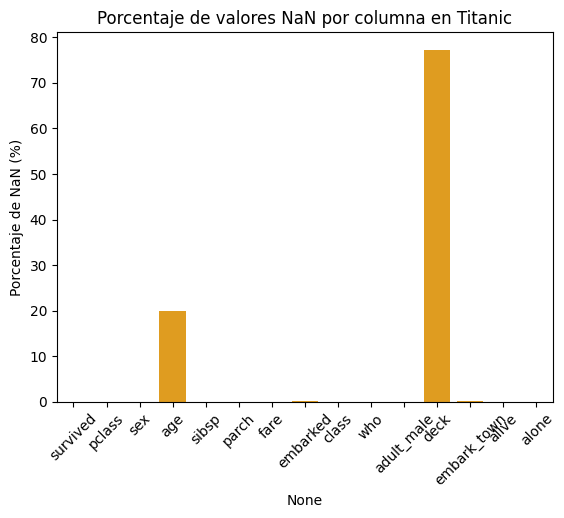

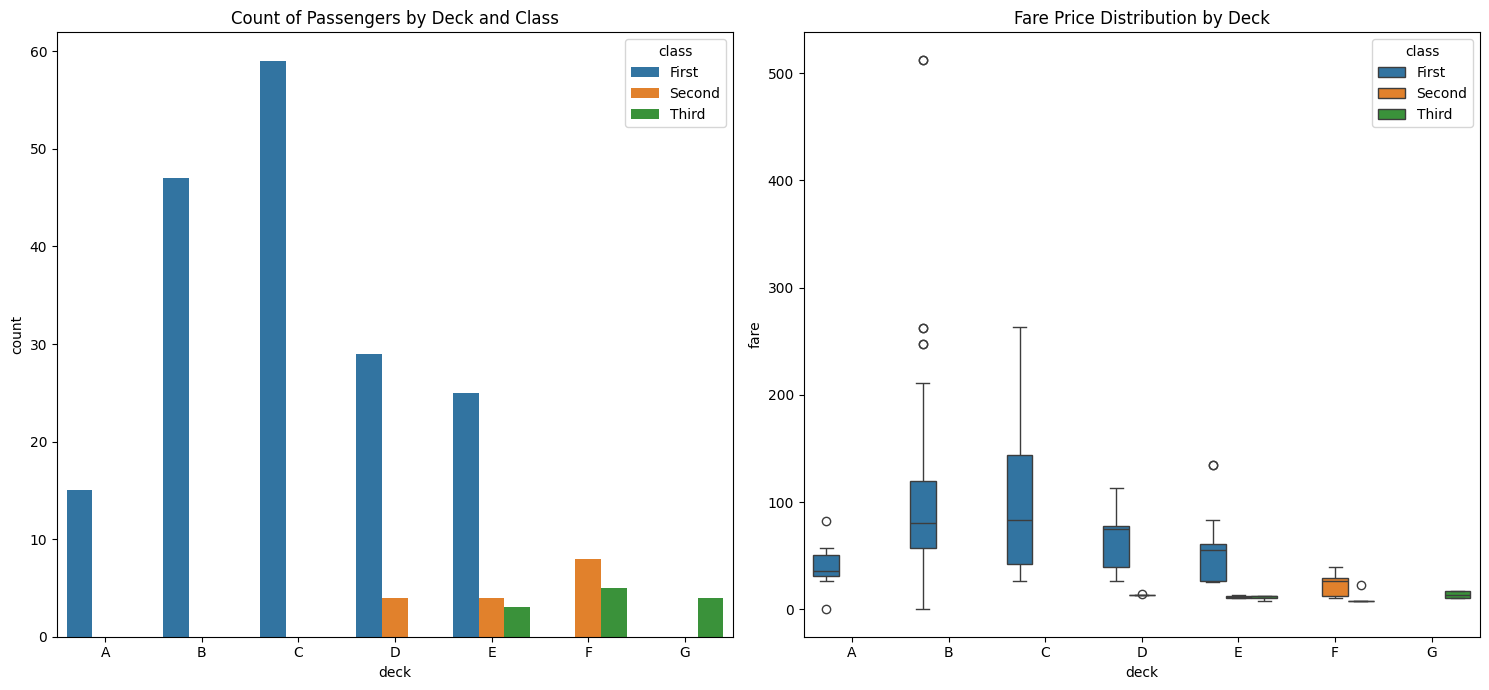

In [13]:
nan_percent = df_titanic.isna().mean() * 100
sns.barplot(x=nan_percent.index, y=nan_percent.values, color='orange')
plt.ylabel('Porcentaje de NaN (%)')
plt.xticks(rotation=45)
plt.title('Porcentaje de valores NaN por columna en Titanic')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.countplot(data=df_titanic, x='deck', hue='class', ax=axes[0])
axes[0].set_title("Count of Passengers by Deck and Class")

sns.boxplot(data=df_titanic, x='deck', y='fare', hue='class', ax=axes[1])
axes[1].set_title("Fare Price Distribution by Deck")

plt.tight_layout()
plt.show()


In [14]:
# Fill missing 'age' values using mean value
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)

# Ignore the 'deck' variable
df_titanic.drop(columns=['deck'], inplace=True)

# Discard entries with NaN in 'embarked'
df_titanic = df_titanic[df_titanic['embarked'].notna()]

# Discard entries with NaN in 'embarked'
df_titanic = df_titanic[df_titanic['embark_town'].notna()]


# Fill missing 'deck' values using mean deck value per entry class and fare group
# No funciona

# First, create a fare group (e.g., quartiles)
# df_titanic['fare_group'] = pd.qcut(df_titanic['fare'], q=4, labels=False)

# # Map deck letters to numbers for mean calculation
# deck_map = {deck: i for i, deck in enumerate(sorted(df_titanic['deck'].dropna().unique()))}
# df_titanic['deck_num'] = df_titanic['deck'].map(deck_map).astype(float)  # Ensure numeric type

# # Compute mean deck_num per class and fare_group
# mean_deck = df_titanic.groupby(['pclass', 'fare_group'])['deck_num'].mean()
# display(mean_deck)

# # Fill missing deck_num with group mean
# for c in range(1,4):
#     for q in range(4):
#         mask = (df_titanic['deck_num']==c) & (df_titanic['fare_group']==q)
#         mean = mean_deck.get((c, q))
#         print(mean)
#         if(not pd.isna(mean)):
#             df_titanic['deck_filled'] = df_titanic['deck_num'].mask(mask, df_titanic['deck_num']).fillna(mean)
#     #df_titanic['deck_filled'] = df_titanic['deck_num'].fillna(mean_deck)

# # Map back deck_filled to letters
# reverse_deck_map = {v: k for k, v in deck_map.items()}
# deck_letter_map = {v: k for k, v in reverse_deck_map.items()}
# df_titanic['deck_filled'] = df_titanic['deck_filled'].round().map(reverse_deck_map)

# sns.boxplot(data=df_titanic, x='deck_filled', y='fare', hue='class')
# plt.tight_layout()
# plt.show()
# display(df_titanic.head(20))


C:\Users\santi\AppData\Local\Temp\ipykernel_22888\592129924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)


# pre-selección de variables útiles


In [15]:
# Check if 'survived' and 'alive' contain the same information in df_titanic
comparison = (df_titanic['survived'] == (df_titanic['alive'] == 'yes')).all()
print(f"'survived' and 'alive' contain the same information: {comparison}")

# check if 'embarked' always is the first letter of 'embark_town'
embarked_matches = (df_titanic['embarked'] == df_titanic['embark_town'].str[0])
all_match = embarked_matches | df_titanic['embarked'].isna() | df_titanic['embark_town'].isna()
print(f"'embarked' is always the first letter of 'embark_town': {all_match.all()}")


'survived' and 'alive' contain the same information: True
'embarked' is always the first letter of 'embark_town': True


Podemos sacar la columna 'alive' ya que no aporta nueva información.
Ademas podemos sacar la columna 'embarked' ya que no aporta nueva información.

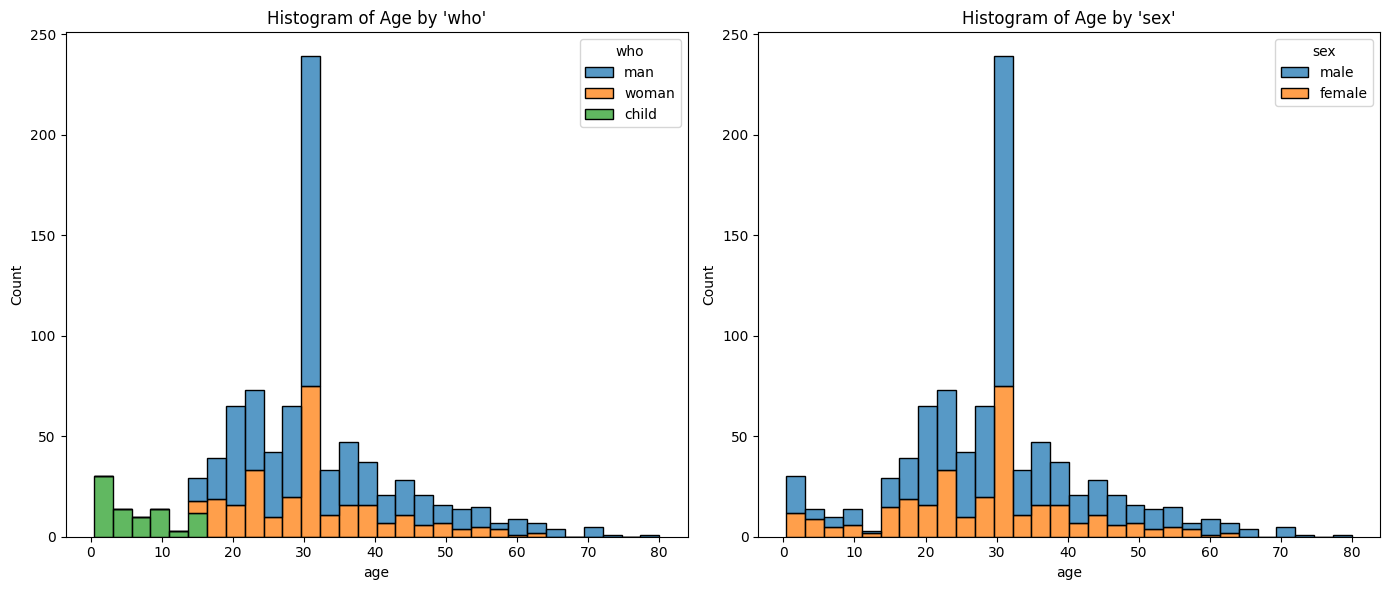

In [16]:
# Histogram of 'age' separated by 'who' and 'sex'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df_titanic, x='age', hue='who', multiple='stack', kde=False, ax=axes[0])
axes[0].set_title("Histogram of Age by 'who'")

sns.histplot(data=df_titanic, x='age', hue='sex', multiple='stack', kde=False, ax=axes[1])
axes[1].set_title("Histogram of Age by 'sex'")

plt.tight_layout()
plt.show()

Vemos que la variable 'Who' es una combinacion de las variables 'age' y 'sex'. Solo que para los menores de determinada edad en vez de hombre y mujer se los categoriza como niños. La podemos sacar ya que no aporta nueva informacion. 

In [17]:
# Ignore the variables 

for col in ['alive', 'embarked', 'who','class','adult_male']:
    if col in df_titanic.columns:
        df_titanic.drop(columns=[col], inplace=True)


# Variables Categoricas

In [18]:
from sklearn.preprocessing import LabelEncoder

# Map text/categorical variables to numerical in df_titanic
# Apply LabelEncoder to each text column
for col in ['sex', 'embark_town', 'alone']:
    le = LabelEncoder()
    df_titanic[col] = le.fit_transform(df_titanic[col])

# Normalizacion

In [19]:
# Normalización z-score para 'age' y 'fare'
for col in ['age', 'fare']:
    mean = df_titanic[col].mean()
    std = df_titanic[col].std()
    df_titanic[col] = (df_titanic[col] - mean) / std

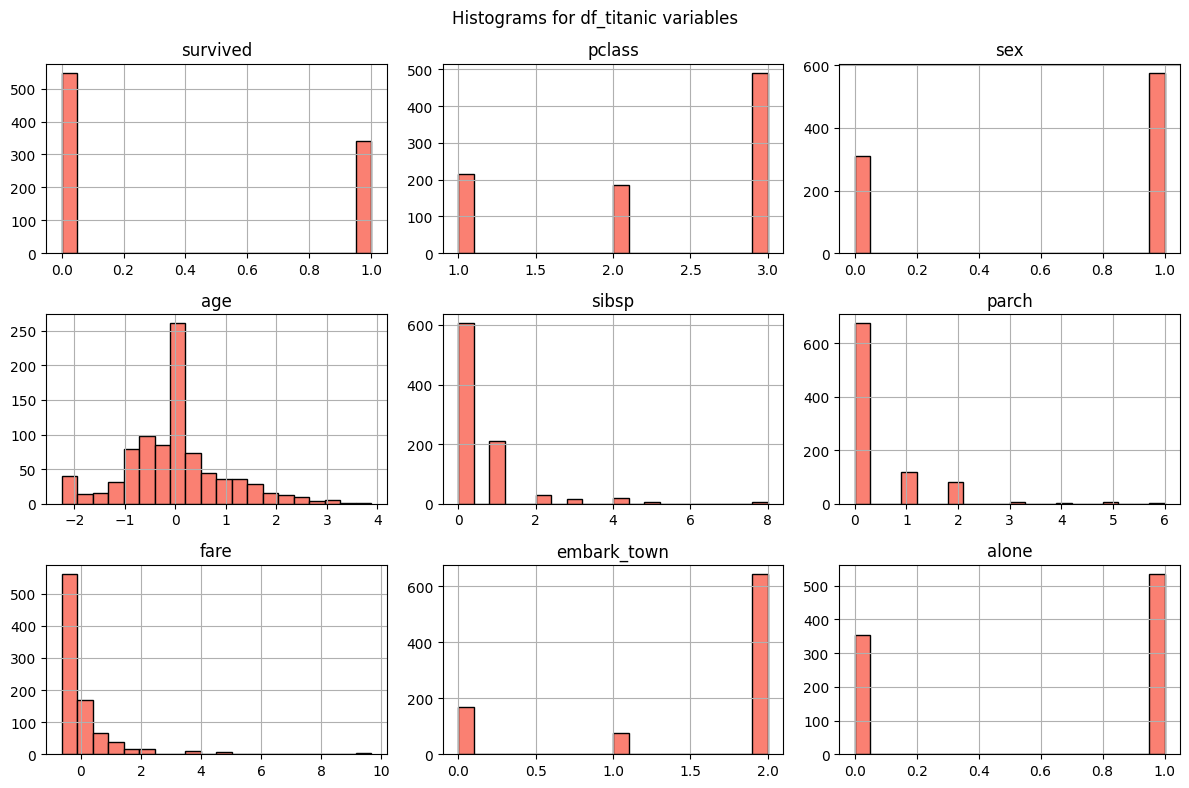

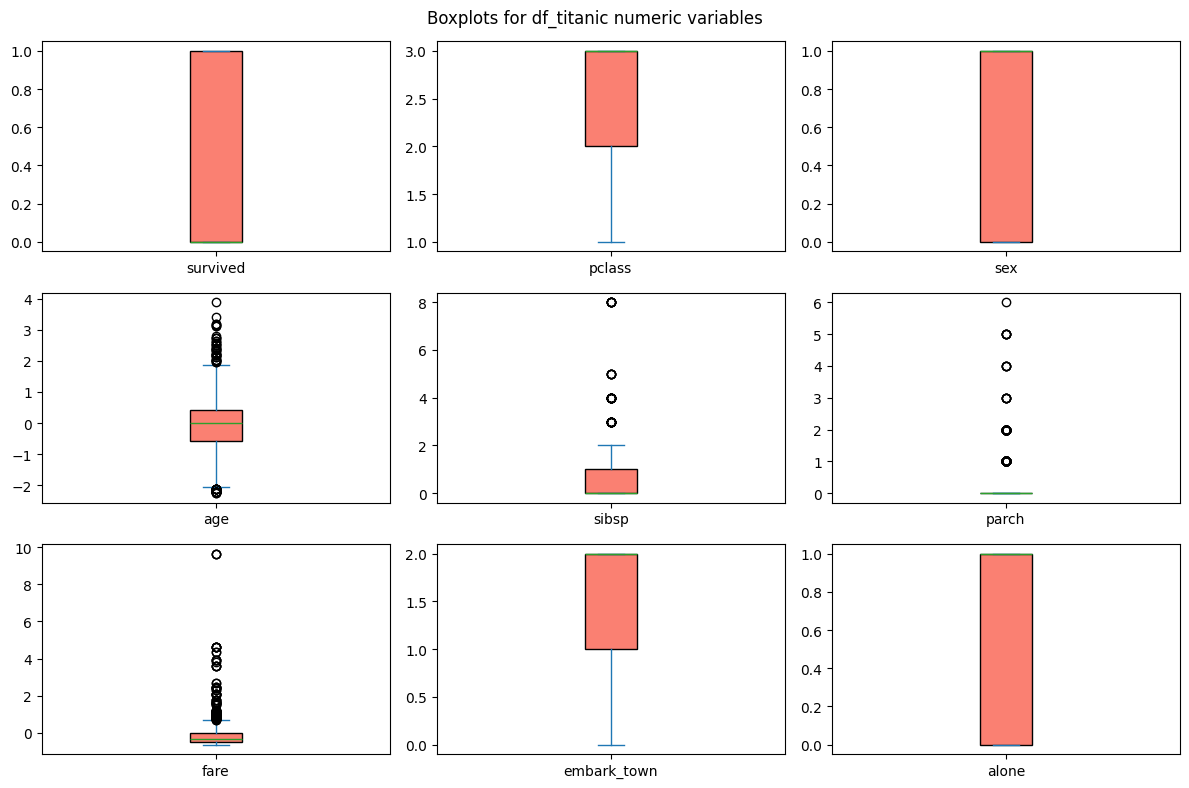

In [20]:
# Visualizamos los datos limpios

# Histograms for df_titanic
df_titanic.hist(bins=20, figsize=(12, 8), color='salmon', edgecolor='black')
plt.suptitle('Histograms for df_titanic variables')
plt.tight_layout()
plt.show()

# Boxplots for df_titanic (only numeric columns)
numeric_cols = df_titanic.select_dtypes(include=np.number).columns
df_titanic[numeric_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 8), patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.suptitle('Boxplots for df_titanic numeric variables')
plt.tight_layout()
plt.show()



## Ejercicio 3a: Biplots

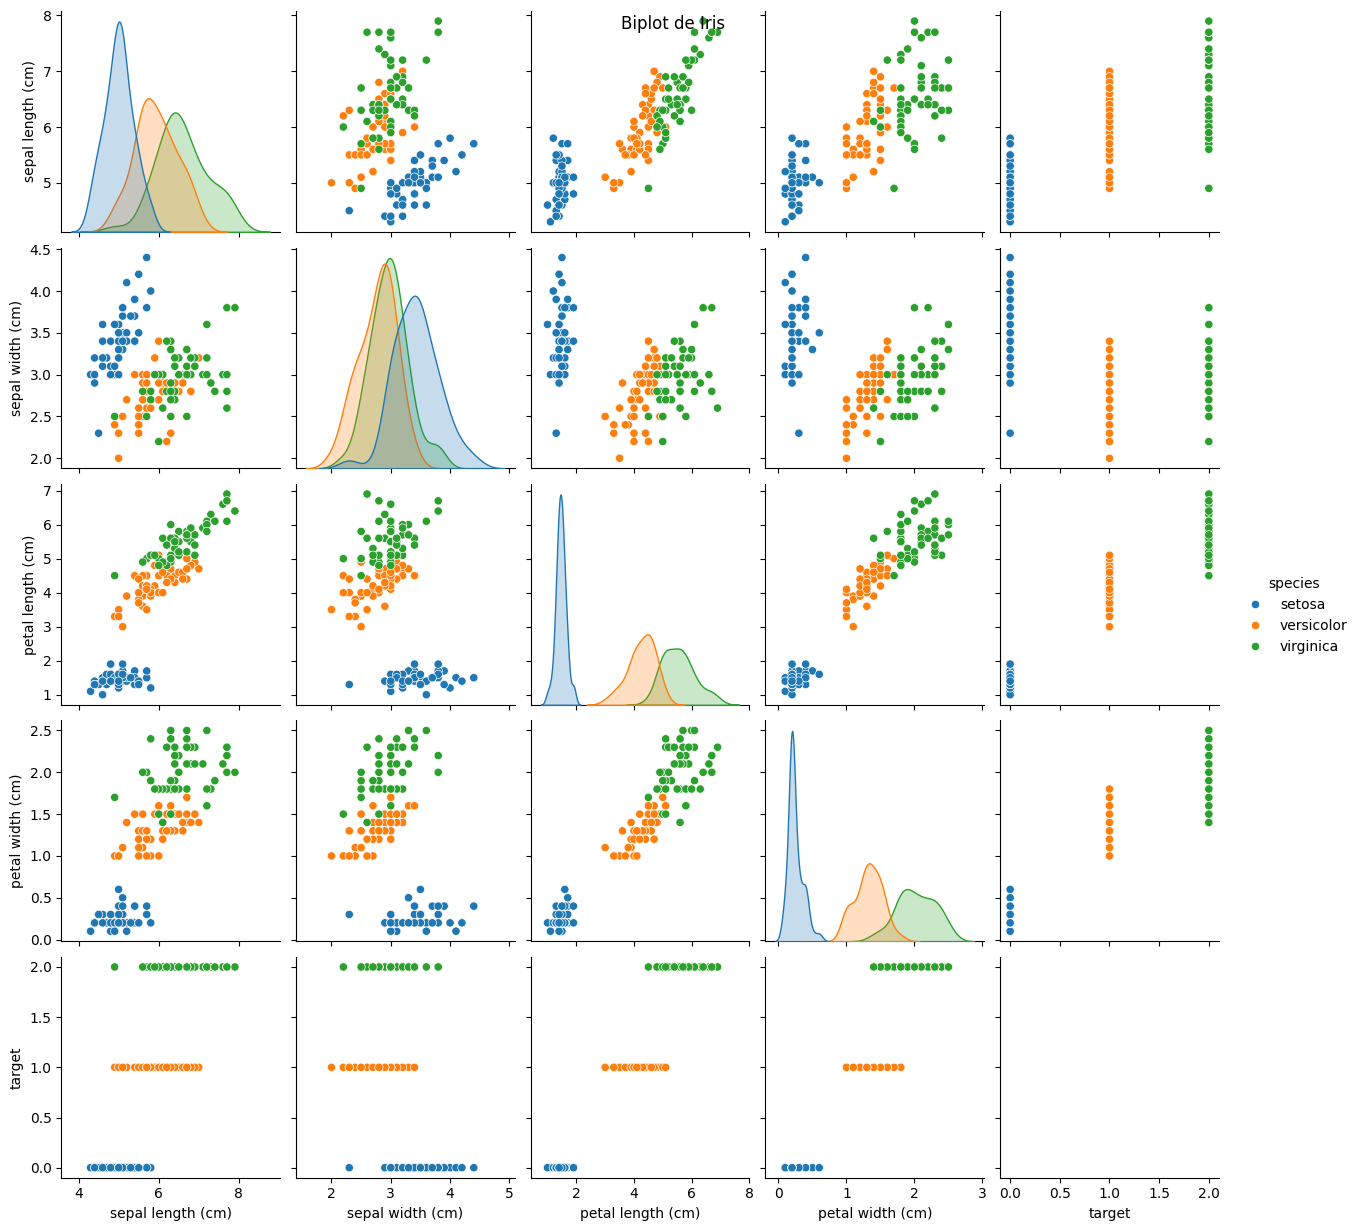

In [21]:
# construimos el biplot (pairplot en seaborn)
sns.pairplot(df_iris, hue="species", diag_kind="kde")


# graficamos
plt.suptitle("Biplot de Iris")
plt.show()

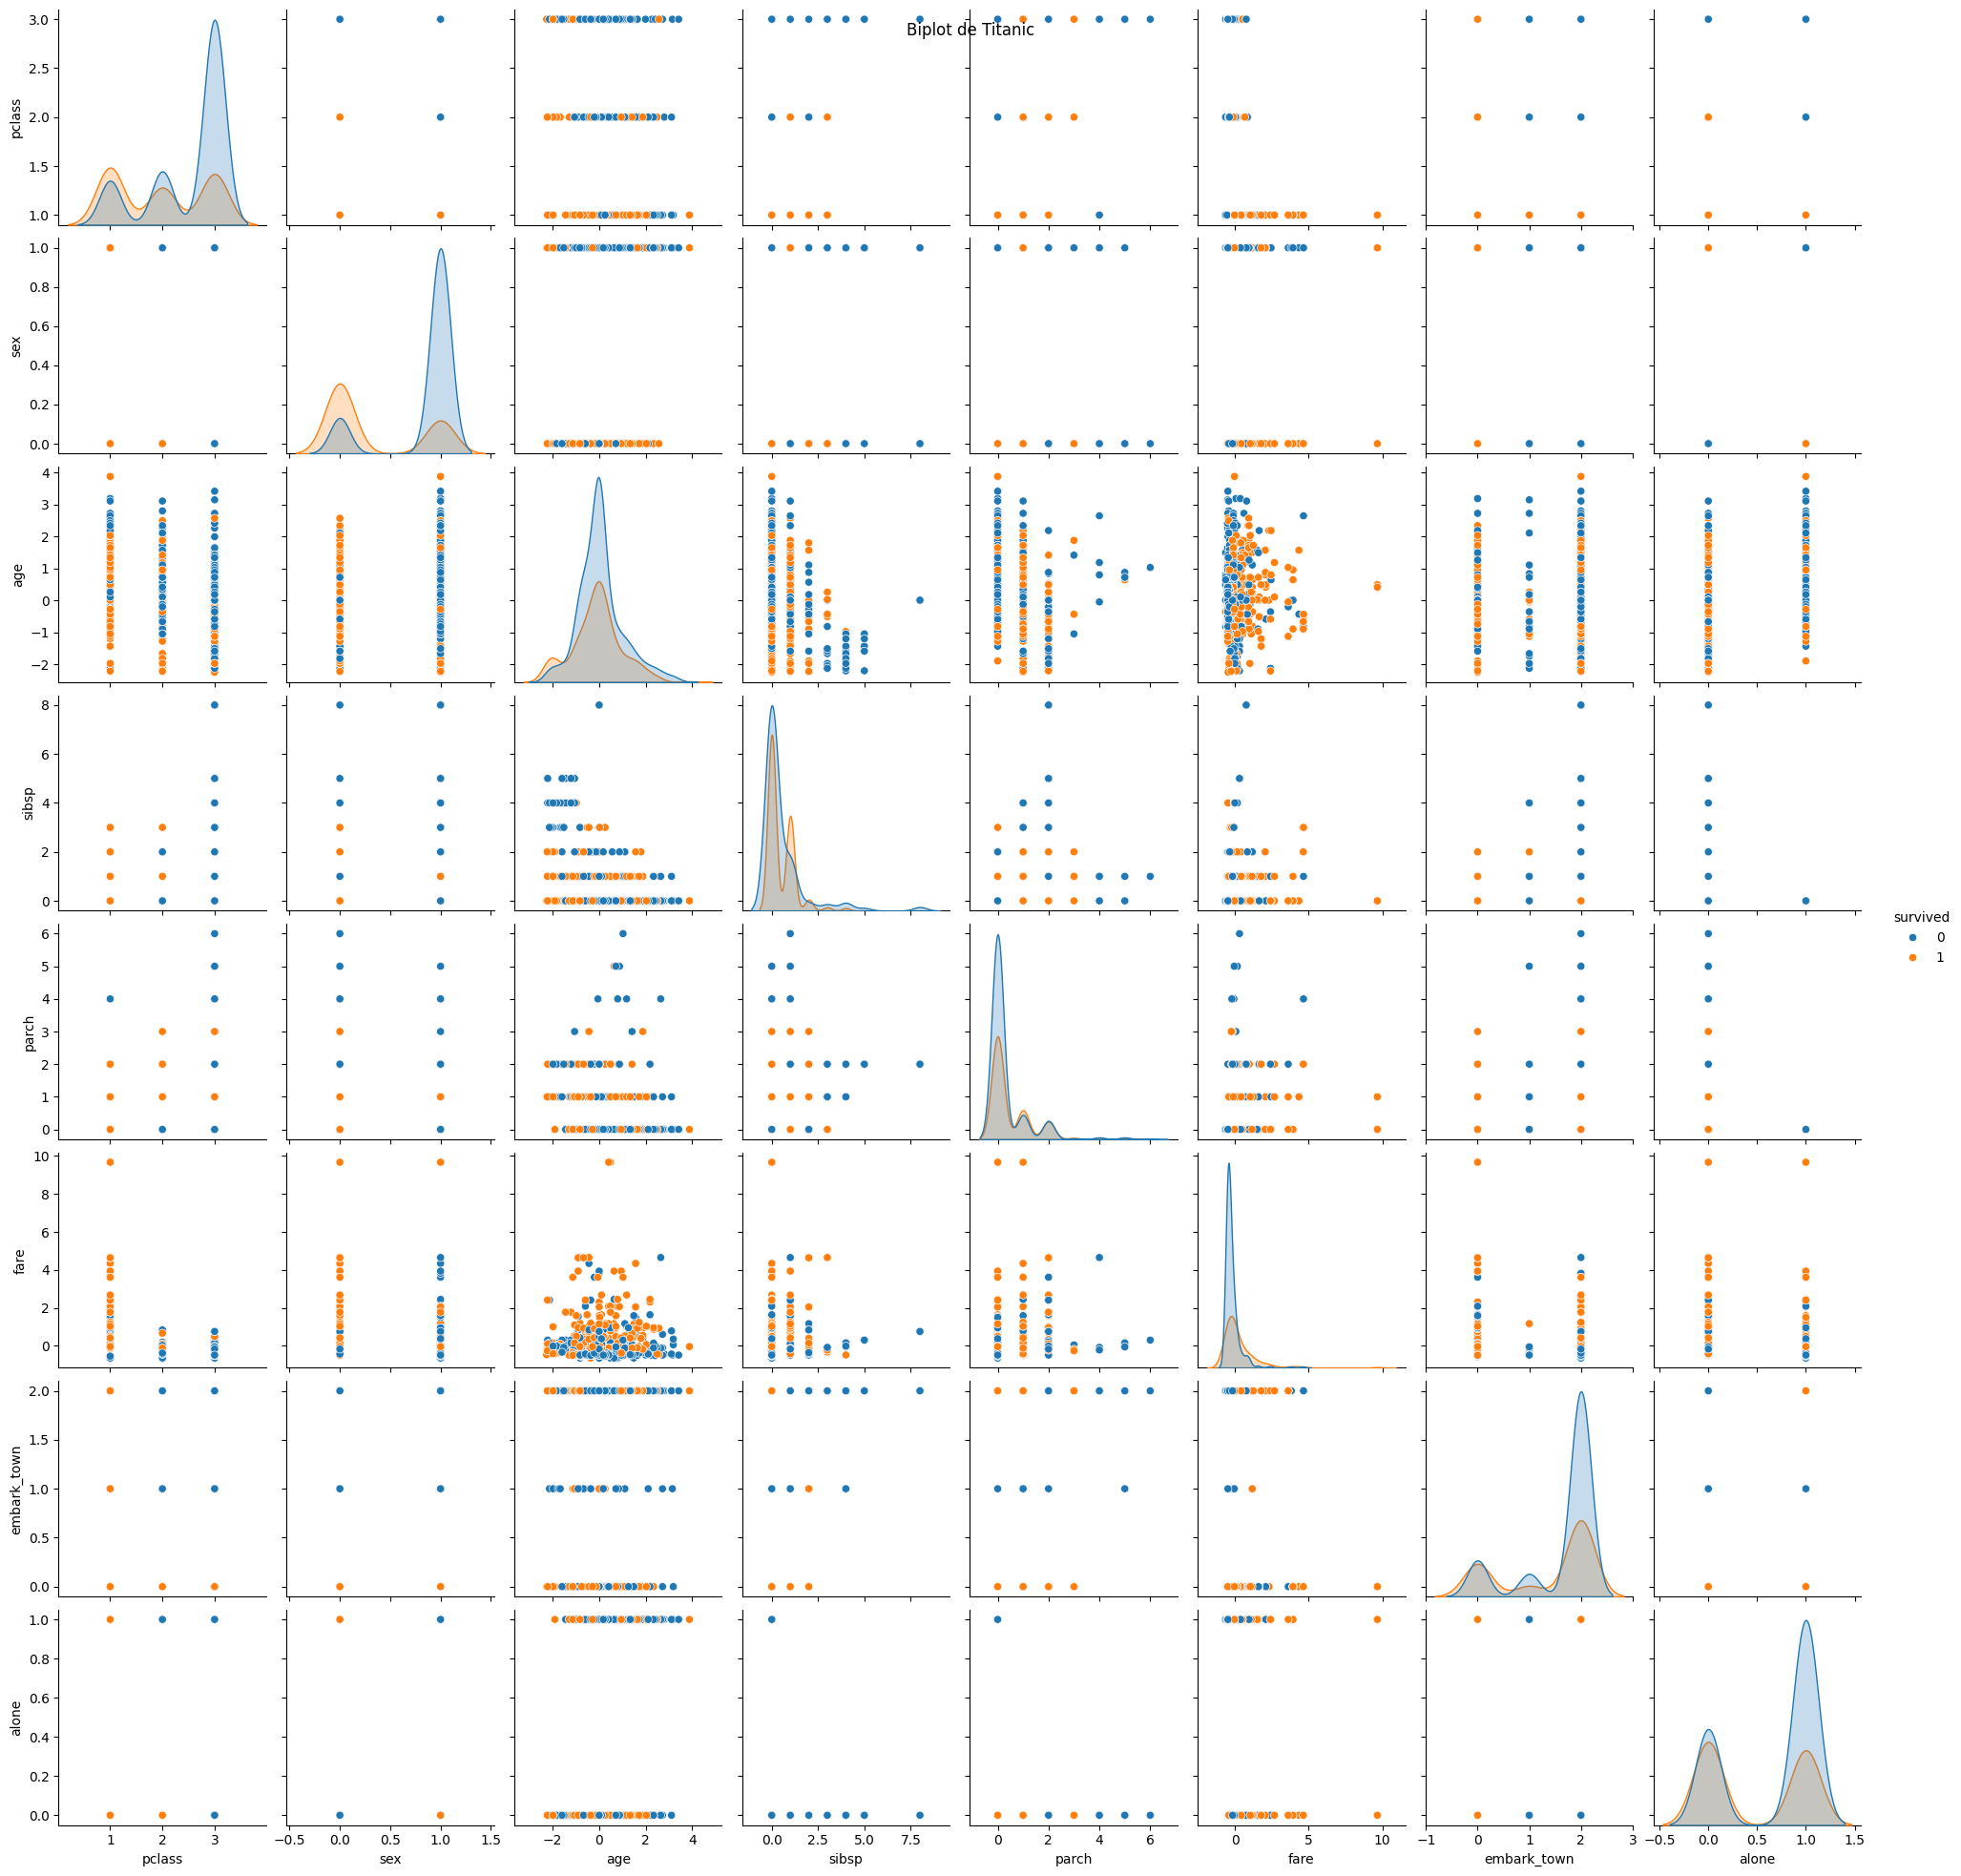

In [22]:
# construimos el biplot (pairplot en seaborn)
sns.pairplot(df_titanic, hue="survived", diag_kind="kde")


# graficamos
plt.suptitle("Biplot de Titanic")
plt.show()


# Ejercicio 3b: Coordenadas Paralelas

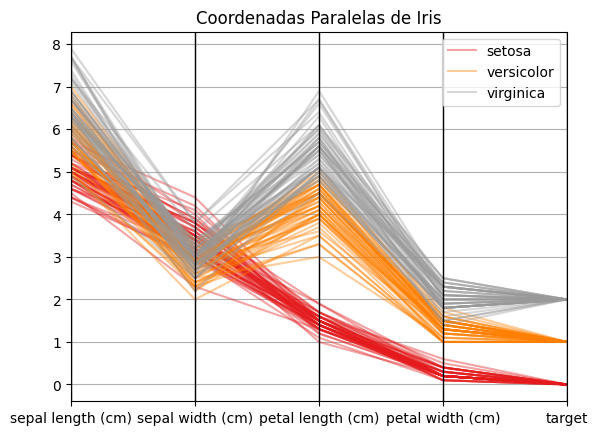

In [23]:
parallel_coordinates( df_iris, 'species', colormap=plt.get_cmap("Set1"), alpha=0.4)

# graficamos
plt.title("Coordenadas Paralelas de Iris")
plt.show()

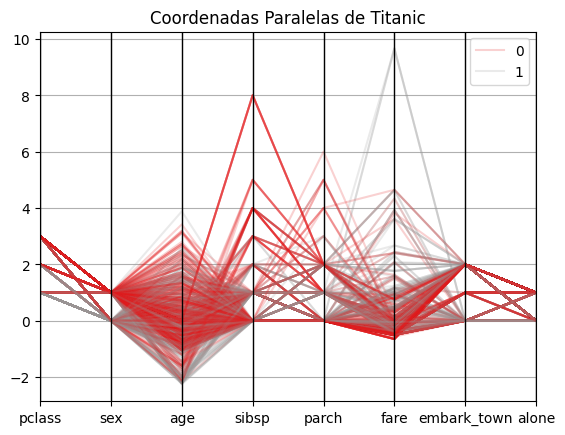

In [24]:
parallel_coordinates(df_titanic, 'survived', colormap=plt.get_cmap("Set1"), alpha=0.2)

# graficamos
plt.title("Coordenadas Paralelas de Titanic")
plt.show()

# Ejercicio 3c: Star Plots

In [29]:
import plotly.graph_objects as go

# Select numeric columns for the plot
cols = ['age', 'fare' , 'sex', 'embark_town', 'alone', 'pclass'] # 'sibsp', 'parch'

# Take a sample to avoid overcrowding
sample = df_titanic.sample(100, random_state=0)

fig = go.Figure()

for idx, row in sample.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[cols],
        theta=cols,
        name=f"Passenger {idx}",
        marker=dict(color='orange' if row['survived'] else 'blue'),
        opacity=0.5,
        showlegend=False
    ))

fig.update_layout(
    title="Titanic Passenger Scatterpolar Plot",
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=False
)

fig.show()

In [ ]:
fig = ply.graph_objects.Figure() # COMPLETAR
go.Scatterpolar(
        r=row[cols],
        theta=cols,
        name=f"Passenger {idx}",
        marker=dict(color='orange' if row['survived'] else 'blue'),
        opacity=0.5,
        showlegend=False
    )
trace = ply.graph_objects.Scatterpolar(df_titanic, marker=dict(color='orange' if row['survived'] else 'blue'), opacity=0.5,showlegend=False) # COMPLETAR
fig.add_trace(trace)  # COMPLETAR

# graficamos con plotly
fig.show()

ValueError: The first argument to the plotly.graph_objs.Scatterpolar
constructor must be a dict or
an instance of :class:`plotly.graph_objs.Scatterpolar`

# Ejercicio 3d: Chernoffs Faces

In [ ]:
# Tengan en cuenta el reescalado de variables de la librería
# `variables_rescale(...)`, ¿qué hace?

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    face = chernoff_face(...)  # COMPLETAR
    face.plot(ax=ax)
    ax.set_title(...)  # COMPLETAR
plt.suptitle("Chernoff Faces de Iris")
plt.show()